In this notebook we will investigate weather centrality trading works.

In [1]:
import pandas as pd

# Specify the file path
file_path = 'CentralityData.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)
df

df = df.set_index('Unnamed: 0')

df = df.rename_axis('Date')
df.tail()
earliest_date = df.index.min()
latest_date = df.index.max()



In [2]:



df_high = df.apply(lambda row: row == row.max(), axis=1).astype(int)

df_high.head()

def adjust_pick_values(row):
    count = row.sum()
    return row / count if count > 0 else row

df_high_adjusted = df_high.apply(adjust_pick_values, axis=1)
df_high_adjusted.tail()





,NVDA,GOOGL,AMZN,NFLX,TSLA,AAPL,META,MSFT
Date,,,,,,,,
2023-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-09-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-10-31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2023-11-30,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2023-12-31,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Text(0, 0.5, 'Count')

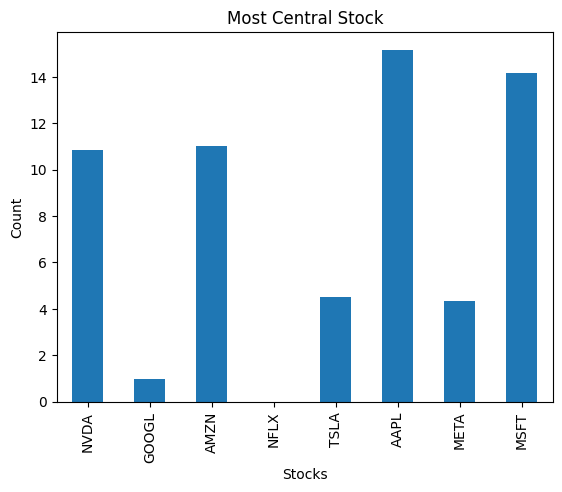

In [3]:


column_sums = df_high_adjusted.sum()

ax = column_sums.plot(kind='bar')
ax.set_title('Most Central Stock')
ax.set_xlabel('Stocks')
ax.set_ylabel('Count')


Text(0, 0.5, 'Count')

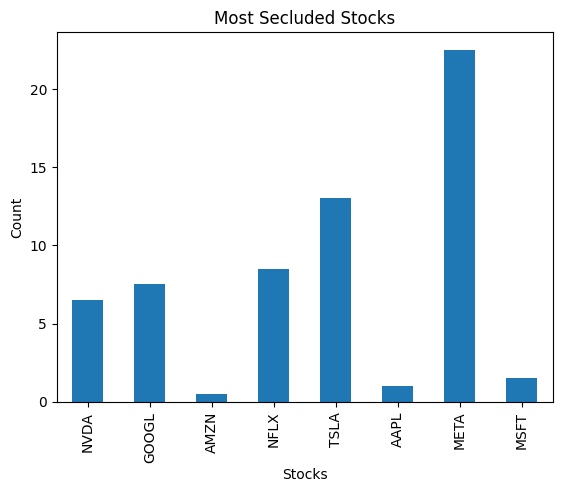

In [4]:

df_low = df.eq(df.min(axis=1), axis=0).astype(int)

df_low_adjusted = df_low.apply(adjust_pick_values, axis=1)
df_low_adjusted.head()
column_sums = df_low_adjusted.sum()
ax = column_sums.plot(kind='bar')
ax.set_title('Most Secluded Stocks')
ax.set_xlabel('Stocks')
ax.set_ylabel('Count')



In [5]:
MAAMA_tickers = ['MSFT', 'AMZN', 'AAPL', 'GOOGL', 'META']
FAANG_tickers = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOGL']
Magnificent7_tickers = ['AMZN', 'AAPL', 'GOOGL', 'MSFT', 'META', 'TSLA', 'NVDA']
combined_tickers = MAAMA_tickers + FAANG_tickers + Magnificent7_tickers
combined_tickers

import yfinance as yf


tickers = combined_tickers

# Download historical data for the tickers
data = yf.download(tickers, start=earliest_date, end=latest_date)

# Calculate the monthly returns
monthly_returns = data['Adj Close'].resample('M').ffill().pct_change().dropna()

monthly_returns.head()


picked_returns = monthly_returns * df_high_adjusted

picked_returns.head()
strats = pd.DataFrame(picked_returns.sum(axis=1), columns=['Central'])
strats.head()


picked_returns.sum()

sum_of_each_value = picked_returns.sum().sum()
central_strat=sum_of_each_value
sum_of_each_value
print("Central strategy has a return of", sum_of_each_value)



[*********************100%***********************]  8 of 8 completed
Central strategy has a return of 2.401437443514241


In [6]:
picked_returns = monthly_returns * df_low_adjusted
picked_returns.head()
strats['Decentral'] = picked_returns.sum(axis=1)
#strats.head()


In [7]:
sum_of_each_value = picked_returns.sum().sum()
decentral_strat=sum_of_each_value
print("Secluded strategy has a return of", sum_of_each_value)

Secluded strategy has a return of 2.7419724382181974


In [8]:
picked_returns.sum()

AAPL     0.070901
AMZN     0.013336
GOOGL    0.458870
META     0.388263
MSFT    -0.001235
NFLX     0.629559
NVDA     0.310052
TSLA     0.872227
dtype: float64

In [9]:
df_random = pd.DataFrame(0.1, index=df_high_adjusted.index, columns=df_high_adjusted.columns)
df_random.head()

,NVDA,GOOGL,AMZN,NFLX,TSLA,AAPL,META,MSFT
Date,,,,,,,,
2018-12-31,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-01-31,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-02-28,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-03-31,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-04-30,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [10]:

picked_returns = monthly_returns * df_random

picked_returns.head()
strats['Random'] = picked_returns.sum(axis=1)
strats.head()


,Central,Decentral,Random
Date,,,
2018-12-31,0.000000,0.000000,0.000000
2019-01-31,0.076779,-0.077464,0.084436
2019-02-28,0.074219,0.043331,0.021627
2019-03-31,0.164009,-0.014042,0.034746
2019-04-30,0.081859,-0.147109,0.032475


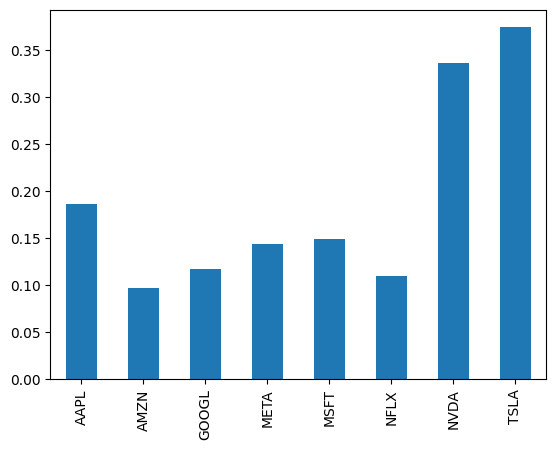

In [11]:
picked_returns.sum().plot(kind='bar')
sum_of_each_value = picked_returns.sum().sum()

In [12]:
total_sum = picked_returns.sum()
total_sum



AAPL     0.186419
AMZN     0.097023
GOOGL    0.116884
META     0.143425
MSFT     0.149238
NFLX     0.109599
NVDA     0.336292
TSLA     0.374481
dtype: float64

In [13]:
sum_of_each_value = picked_returns.sum().sum()
rand_strat=sum_of_each_value
print("Secluded strategy has a return of", sum_of_each_value)

Secluded strategy has a return of 1.5133589501269271


We see that the strategy performs just the same as a completely random agent

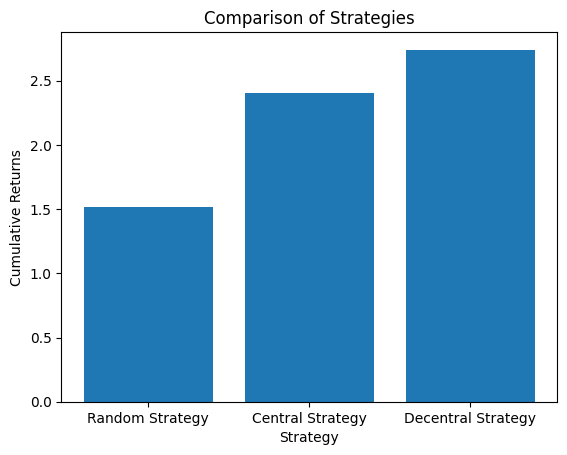

In [14]:
import matplotlib.pyplot as plt

# Values
values = [rand_strat, central_strat, decentral_strat]

# Labels
labels = ['Random Strategy', 'Central Strategy', 'Decentral Strategy']

# Plotting
plt.bar(labels, values)
plt.xlabel('Strategy')
plt.ylabel('Cumulative Returns')
plt.title('Comparison of Strategies')
plt.show()


we see our strategy in fact works

<AxesSubplot: xlabel='Date'>

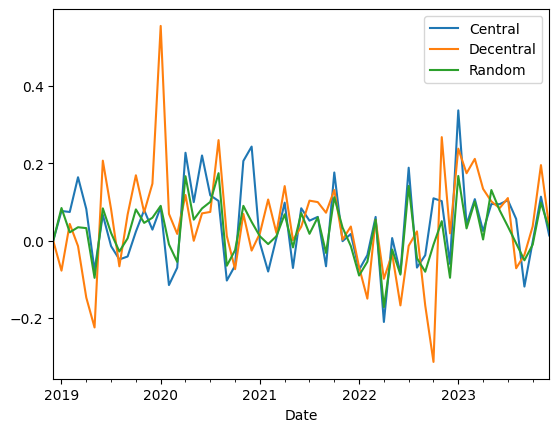

In [15]:
strats.plot()


we are just paying for more risk doesnt really explain much

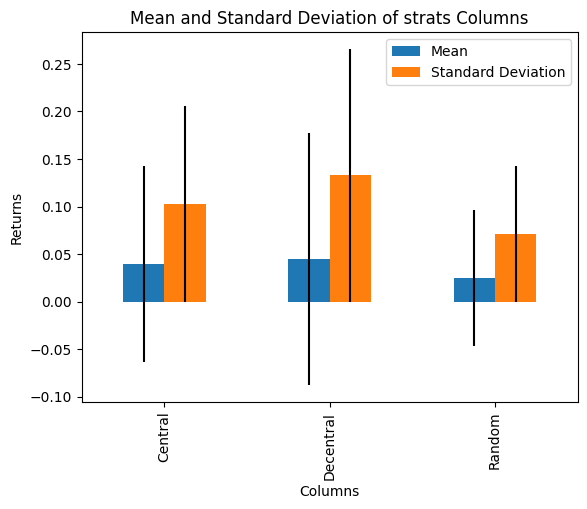

In [21]:
strats_mean = strats.mean()
strats_std = strats.std()

ax = pd.concat([strats_mean, strats_std], axis=1).plot(kind='bar', yerr=strats_std)
ax.set_title('Mean and Standard Deviation of strats Columns')
ax.set_xlabel('Columns')
ax.set_ylabel('Returns')
ax.set_xticklabels(['Central', 'Decentral', 'Random'])  # Add x-axis labels
plt.legend(['Mean', 'Standard Deviation'])  # Add legend labels
